In [161]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [162]:
beer =  pd.read_csv('brutaltruthmatch-pr.csv', encoding = "ISO-8859-1")
beer.columns

Index(['beer_link', 'rDev', 'user_rating', 'ABV', 'Availaility', 'Brewer',
       'BrosScore', 'ImageLink', 'Location', 'Name', 'Ranking', 'RatingCount',
       'ReviewCount', 'Score', 'good', 'ScoreClass', 'Style', 'URL', 'pDev',
       'Flavor', 'Hoppiness', 'Maltiness', 'Fruitiness', 'Body', 'Sweetness',
       'Sour', 'spicy', 'bitter', 'Aroma_None', 'Aroma_caramel',
       'Aroma_floral', 'Aroma_fruit', 'Custom Flavor_None',
       'Custom Flavor_banana', 'Custom Flavor_brown sugar',
       'Custom Flavor_burnt', 'Custom Flavor_caramel',
       'Custom Flavor_chocolate', 'Custom Flavor_earthy',
       'Custom Flavor_herbal', 'Custom Flavor_pumpkin',
       'Custom Flavor_roasted', 'Custom Flavor_smoke', 'Custom Flavor_toasted',
       'Custom Flavor_wheat', 'Color_amber', 'Color_black', 'Color_dark ',
       'Color_gold', 'Color_pale'],
      dtype='object')

In [163]:
X = beer[["Flavor","Hoppiness","Maltiness","Fruitiness","Body", "pDev",
          "Sweetness","Sour","spicy","bitter", 'Aroma_None', 'Aroma_caramel',
       'Aroma_floral', 'Aroma_fruit', 'Custom Flavor_None',
       'Custom Flavor_banana', 'Custom Flavor_brown sugar',
       'Custom Flavor_burnt', 'Custom Flavor_caramel',
       'Custom Flavor_chocolate', 'Custom Flavor_earthy',
       'Custom Flavor_herbal', 'Custom Flavor_pumpkin',
       'Custom Flavor_roasted', 'Custom Flavor_smoke', 'Custom Flavor_toasted',
       'Custom Flavor_wheat', 'Color_amber', 'Color_black', 'Color_dark ',
       'Color_gold', 'Color_pale' ]]
y = beer["good"].values.reshape(-1, 1)
print(X.shape, y.shape)


(707, 32) (707, 1)


## K Nearest Neighbors

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [165]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [166]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.998/0.938
k: 3, Train/Test Score: 0.968/0.944
k: 5, Train/Test Score: 0.966/0.944
k: 7, Train/Test Score: 0.968/0.949
k: 9, Train/Test Score: 0.964/0.949


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k: 11, Train/Test Score: 0.964/0.944
k: 13, Train/Test Score: 0.960/0.944
k: 15, Train/Test Score: 0.960/0.944
k: 17, Train/Test Score: 0.960/0.944
k: 19, Train/Test Score: 0.960/0.944


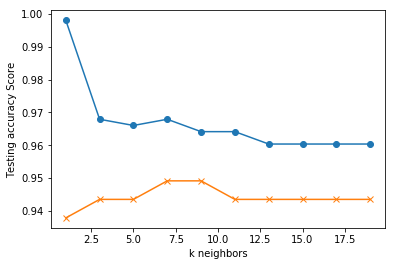

In [167]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [168]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.944


/Users/paul/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [169]:
recommend_list = pd.read_csv('brutaltruthrecs.csv', encoding = "ISO-8859-1")

In [170]:
recommend_list = recommend_list[recommend_list["Score"] > 4]

In [171]:
new_beer_data = recommend_list[["Flavor","Hoppiness","Maltiness","Fruitiness","Body", "pDev",
          "Sweetness","Sour","spicy","bitter",'Aroma_None', 'Aroma_caramel', 
       'Aroma_floral', 'Aroma_fruit', 'Custom Flavor_None',
       'Custom Flavor_banana', 'Custom Flavor_brown sugar',
       'Custom Flavor_burnt', 'Custom Flavor_caramel',
       'Custom Flavor_chocolate', 'Custom Flavor_earthy',
       'Custom Flavor_herbal', 'Custom Flavor_pumpkin',
       'Custom Flavor_roasted', 'Custom Flavor_smoke', 'Custom Flavor_toasted',
       'Custom Flavor_wheat', 'Color_amber', 'Color_black', 'Color_dark ',
       'Color_gold', 'Color_pale']]
predicted_class = knn.predict(new_beer_data)
print(predicted_class)

['bad' 'bad' 'bad' ..., 'bad' 'bad' 'bad']


In [172]:
for item in predicted_class:
    print(item)

bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
good
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad

In [173]:
recommend_list["recommended"] = predicted_class

In [178]:
recommend_list[recommend_list["recommended"] =="good"]["Style"]

2708                         Vienna Lager
7703                      American Porter
7720                      American Porter
7730                      American Porter
7958                      American Porter
7972                      American Porter
7982                      American Porter
7988                      American Porter
8067                      American Porter
8105                      American Porter
8106                      American Porter
8150                      American Porter
8152                      American Porter
8218                      American Porter
8287                      American Porter
8346                      American Porter
8354                      American Porter
8383                      American Porter
8434                      American Porter
8440                      American Porter
8505                      American Porter
8523                      American Porter
8665                      American Porter
8690                      American

In [174]:
df = recommend_list[recommend_list["recommended"] == "good"].sort_values("Score", ascending=False).groupby("Style").head(2)

In [175]:
recommend_list[recommend_list["recommended"] == "good"]

,beer_link,rDev,user_rating,ABV,Availaility,Brewer,BrosScore,ImageLink,Location,Name,...,Custom Flavor_roasted,Custom Flavor_smoke,Custom Flavor_toasted,Custom Flavor_wheat,Color_amber,Color_black,Color_dark,Color_gold,Color_pale,recommended
2708,NaN,NaN,NaN,5.0,Rotating,Thornbridge Brewery,0.00,https://cdn.beeradvocate.com/im/beers/72939.jpg,"England, United Kingdom",Kill Your Darlings,...,0,0,0,0,1,0,0,0,0,good
7703,NaN,NaN,NaN,7.6,Rotating,Cellarmaker Brewing Co.,0.00,https://cdn.beeradvocate.com/im/placeholder-be...,"California, United States",Coffee And Cigarettes,...,0,0,0,0,0,0,1,0,0,good
7720,NaN,NaN,NaN,7.5,Rotating,Tyranena Brewing Company,0.00,https://cdn.beeradvocate.com/im/beers/29219.jpg,"Wisconsin, United States",Who's Your Daddy? Bourbon Barrel-Aged Imperial...,...,0,0,0,0,0,0,1,0,0,good
7730,NaN,NaN,NaN,8.2,Rotating,Spiteful Brewing,0.00,https://cdn.beeradvocate.com/im/beers/93070.jpg,"Illinois, United States",God Damn Pigeon Porter,...,0,0,0,0,0,0,1,0,0,good
7958,NaN,NaN,NaN,7.0,Rotating,Perrin Brewery,0.00,https://cdn.beeradvocate.com/im/placeholder-be...,"Michigan, United States",Kingdom Of Tonga Vanilla Porter,...,0,0,0,0,0,0,1,0,0,good
7972,NaN,NaN,NaN,7.5,Rotating,Sierra Nevada Brewing Co.,0.00,https://cdn.beeradvocate.com/im/beers/47407.jpg,"California, United States",Imperial Smoked Porter,...,0,0,0,0,0,0,1,0,0,good
7982,NaN,NaN,NaN,10.6,Rotating,Revolution Brewing,0.00,https://cdn.beeradvocate.com/im/placeholder-be...,"Illinois, United States",Hugene,...,0,0,0,0,0,0,1,0,0,good
7988,NaN,NaN,NaN,10.0,Rotating,Ballast Point Brewing Company,0.00,https://cdn.beeradvocate.com/im/placeholder-be...,"California, United States",Victory At Sea - Three Sheets Rum Barrel Aged,...,0,0,0,0,0,0,1,0,0,good
8067,NaN,NaN,NaN,9.6,Rotating,Rushing Duck Brewing Company,0.00,https://cdn.beeradvocate.com/im/beers/216043.jpg,"New York, United States",Imperial Beanhead Coffee Porter,...,0,0,0,0,0,0,1,0,0,good
8105,NaN,NaN,NaN,6.5,Rotating,New England Brewing Co.,0.00,https://cdn.beeradvocate.com/im/placeholder-be...,"Connecticut, United States",Coconut Joy Porter,...,0,0,0,0,0,0,1,0,0,good


In [176]:
df["Style"]

20461    American Double / Imperial Stout
20464    American Double / Imperial Stout
8979                      American Porter
8962                      American Porter
10671                       Oatmeal Stout
10796                       Oatmeal Stout
2708                         Vienna Lager
Name: Style, dtype: object